In [2]:
import cv2
import numpy as np
import tensorflow
import keras
import os
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.model_selection import train_test_split
from random import shuffle
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

C:\Users\sppol\Miniconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sppol\Miniconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sppol\Miniconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sppol\Miniconda3\envs\py36\lib\site-packages\tensorflow\python\f

In [3]:
imageSize = 64
train_data_dir = "C:/Users/sppol/Documents/Ai_Deeplearning/new/train"
validation_data_dir = "C:/Users/sppol/Documents/Ai_Deeplearning/new/validation"
test_data_dir = "C:/Users/sppol/Documents/Ai_deeplearning/new/test"

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.1,                
    zoom_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=45,                              
    horizontal_flip=True,
    ) # set validation split

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(imageSize, imageSize),#64
    batch_size=32,
    color_mode="grayscale",
    classes=['Normal2','Diseases']
#     class_mode='categorical',
    ) # set as training data

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(imageSize, imageSize),#64
    batch_size=32,
    shuffle=False,
    color_mode="grayscale",
#     class_mode='categorical',
    classes=['Normal2','Diseases']
   
    ) # set as validation data

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(imageSize, imageSize),#64
    batch_size=24,
    color_mode="grayscale",
    shuffle=False,
#     class_mode='categorical',
    classes=['Normal2','Diseases']
   
    ) # set as test data


Found 958 images belonging to 2 classes.
Found 292 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.layers import Activation ,Dropout
from keras import optimizers


In [5]:
teeth = Sequential()
teeth.add(Conv2D(32, (3, 3),  strides=(1, 1), padding = "same", activation = "relu", input_shape = (64, 64, 1)))
teeth.add(MaxPooling2D((2, 2)))


teeth.add(Conv2D(64, (3, 3),strides=(1, 1), padding = "same", activation = "relu"))
teeth.add(MaxPooling2D((2, 2)))

teeth.add(Conv2D(64, (3, 3),strides=(1, 1), padding = "same", activation = "relu"))
teeth.add(Dropout(0.5))
teeth.add(MaxPooling2D((2, 2)))

teeth.add(Flatten())

teeth.add(Dense(128, activation='relu'))
teeth.add(Dropout(0.5))
teeth.add(Dense(2, activation = "sigmoid"))

# snake.compile(optimizer ='RMSprop', loss = "binary_crossentropy", metrics = ["accuracy"])
# snake.compile( optimizer=rms, loss = "binary_crossentropy", metrics = ["accuracy"])

teeth.compile(Adam(lr=0.001),loss = "binary_crossentropy", metrics = ["accuracy"])

teeth.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [6]:
filepath = "C:/Users/sppol/Documents/Ai_deeplearning/Files/teeth.h5"
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath, monitor='val_loss', verbose=1,
                               save_best_only=True, save_weights_only=False,
                               mode='min', period=1)
early_stopper =  keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=4, verbose=1, mode='min',
        restore_best_weights=True)
my_callbacks = [early_stopper,checkpointer]

In [7]:
sk=teeth.fit_generator(
    
    train_generator,
#     steps_per_epoch = train_generator.samples, ## batch_size,
        steps_per_epoch = 300, ## batch_size,
    callbacks=my_callbacks,
#     validation_split =0.2 ,
    validation_data = validation_generator, 
#     validation_steps = validation_generator.samples, ## batch_size,
     validation_steps = 75, ## batch_size,
    epochs = 100)

Epoch 1/100
300/300 [==============================] - 145s 482ms/step - loss: 0.3413 - acc: 0.8170 - val_loss: 0.0876 - val_acc: 0.9310

Epoch 00001: val_loss improved from inf to 0.08757, saving model to C:/Users/sppol/Documents/Ai_deeplearning/Files/teeth.h5
Epoch 2/100
300/300 [==============================] - 134s 446ms/step - loss: 0.0607 - acc: 0.9686 - val_loss: 0.0931 - val_acc: 0.9701

Epoch 00002: val_loss did not improve from 0.08757
Epoch 3/100
300/300 [==============================] - 133s 445ms/step - loss: 0.0958 - acc: 0.9594 - val_loss: 0.0823 - val_acc: 0.9764

Epoch 00003: val_loss improved from 0.08757 to 0.08231, saving model to C:/Users/sppol/Documents/Ai_deeplearning/Files/teeth.h5
Epoch 4/100
300/300 [==============================] - 135s 450ms/step - loss: 0.0603 - acc: 0.9692 - val_loss: 0.0874 - val_acc: 0.9756

Epoch 00004: val_loss did not improve from 0.08231
Epoch 5/100
300/300 [==============================] - 132s 441ms/step - loss: 0.0536 - acc: 0

In [8]:
teeth.save('teeth.h5')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


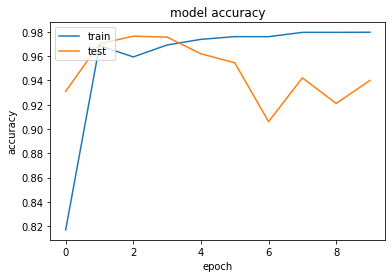

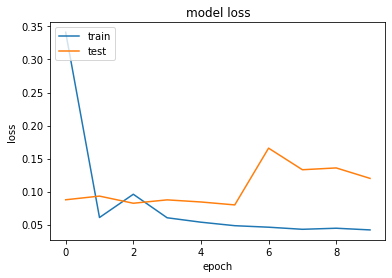

In [9]:
print(sk.history.keys())
# summarize history for accuracy
plt.plot(sk.history['acc'])
plt.plot(sk.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(sk.history['loss'])
plt.plot(sk.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()